# Multi-Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as sm
import statsmodels.formula.api as smf

* Car Data Set Example-

In [2]:
cars = pd.read_csv("/Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [4]:
#to check for any missing values
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [5]:
#Correlation Matrix
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


### Scatterplot between variables along with histograms

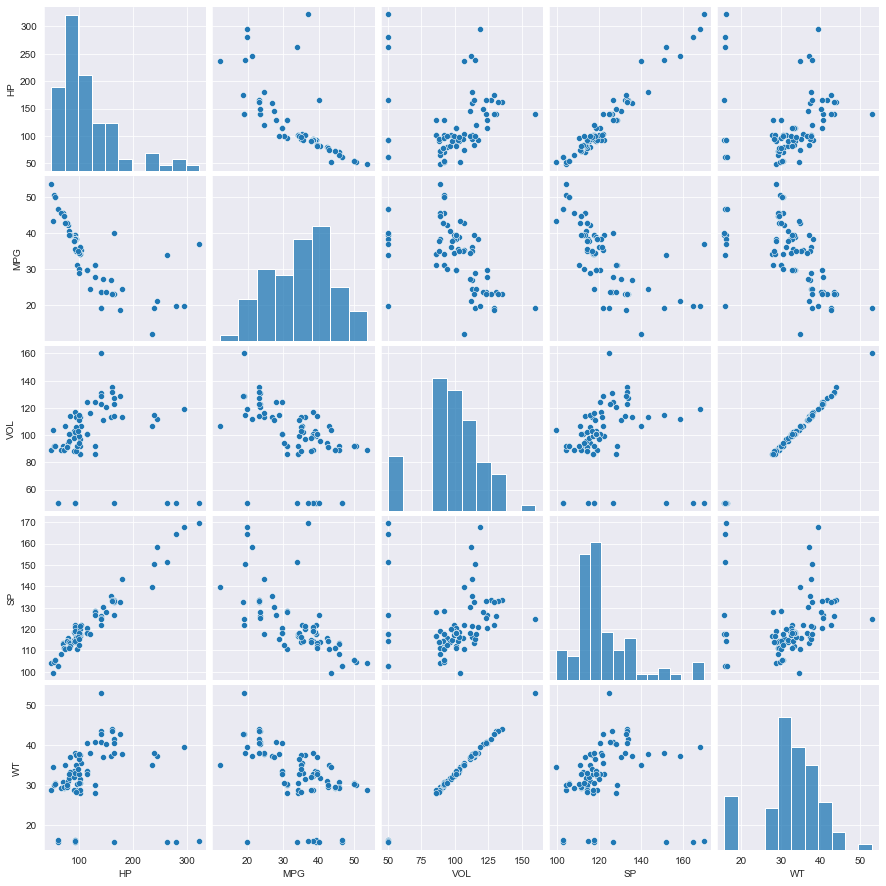

In [6]:
# to check collinearity visually
sns.set_style(style='darkgrid') # style could be-dark,white,darkgrid,whitegrid,ticks
sns.pairplot(cars);

### Preparing a Model

In [7]:
#Build model
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [8]:
#Coefficients
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [9]:
#t and p-Values to find to non-significant variables
print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [10]:
#R squared values
(model.rsquared,model.rsquared_adj,model.aic)

(0.7705372737359844, 0.7584602881431415, 477.92790493548785)

### Simple Linear Regression Models

In [11]:
# to check SLR on insignificant variable individually and together
ml_v=smf.ols('MPG~VOL',data = cars).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [12]:
ml_w=smf.ols('MPG~WT',data = cars).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [13]:
ml_wv=smf.ols('MPG~WT+VOL',data = cars).fit()  
print(ml_wv.tvalues, '\n', ml_wv.pvalues)  

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


### Calculating VIF

In [14]:
# subset of each var ~ on other to find vif which should be < 20 as per business standard
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared  
vif_hp = 1/(1-rsq_hp) 

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared  
vif_wt = 1/(1-rsq_wt) 

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared  
vif_vol = 1/(1-rsq_vol) 

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared  
vif_sp = 1/(1-rsq_sp)

# Storing vif values in a data frame table by creating a dictionary
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


## Residual Analysis

### Test for Normality of Residuals (Q-Q Plot)

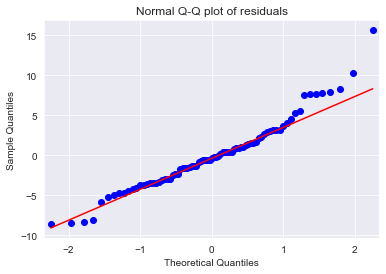

In [15]:
#to plot the errors on line ,line=q means to create a ols best line as per quartiles 
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [16]:
#to check the outlayer value it will return observations
list(np.where(model.resid>10))

[array([ 0, 76], dtype=int64)]

### Residual Plot for Homoscedasticity

In [17]:
# to standardize the value for plotting -fitted vs  residuals ->> y^ vs ei ->by creating a std function
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

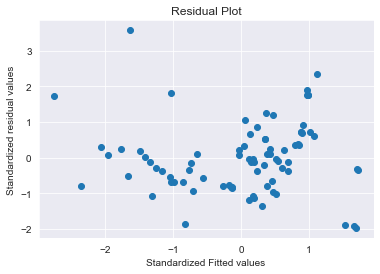

In [18]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Residual Vs Regressors

In [19]:
# to plot xi vs. ei and plotting for each variable to check its significance 

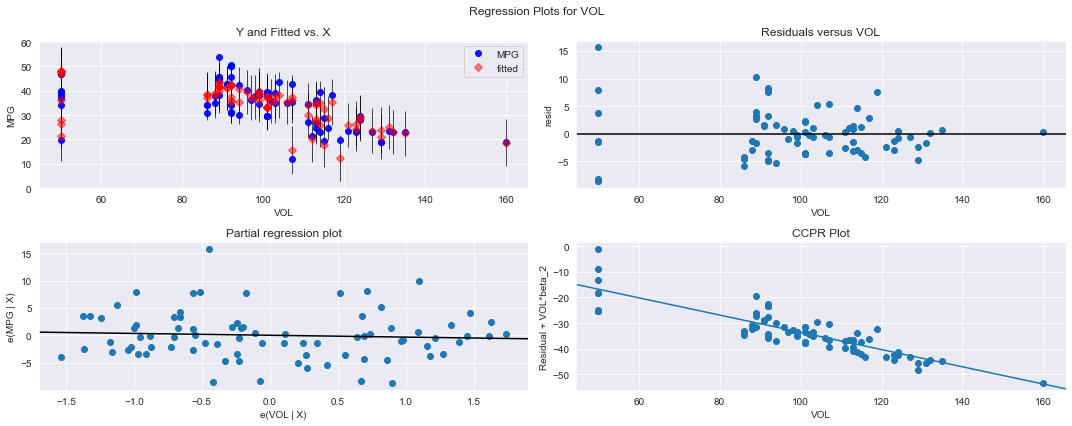

In [20]:
fig_vol = plt.figure(figsize=(15,6))
fig = sm.graphics.plot_regress_exog(model, "VOL", fig=fig_vol)
plt.show()

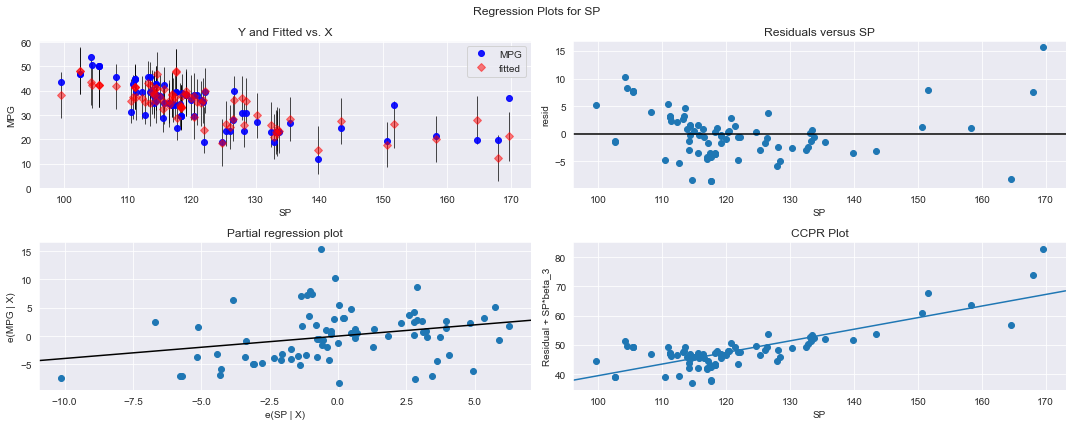

In [21]:
fig_sp = plt.figure(figsize=(15,6))
fig = sm.graphics.plot_regress_exog(model, "SP", fig=fig_sp)
plt.show()

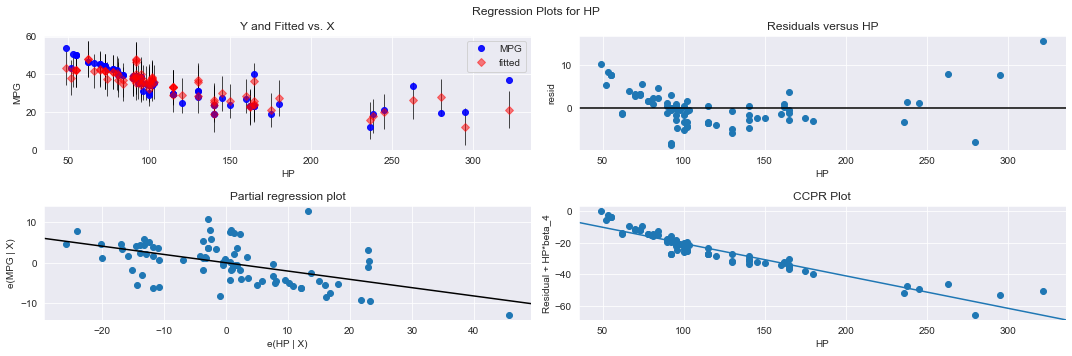

In [22]:
fig_hp = plt.figure(figsize=(15,5))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig_hp)
plt.show()

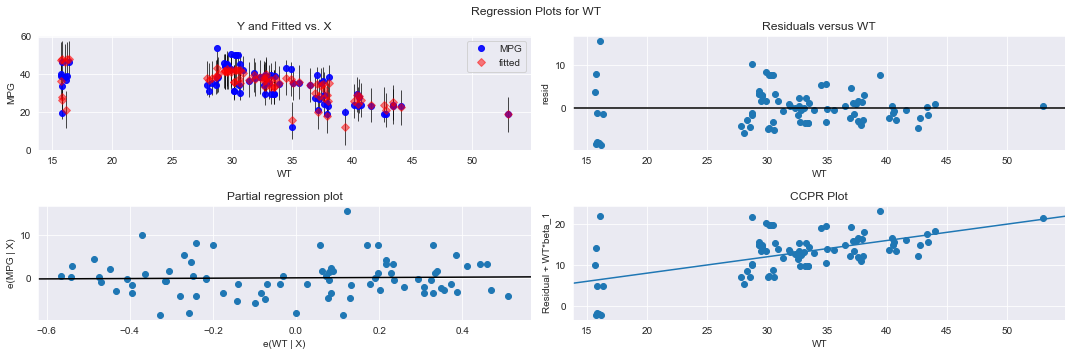

In [23]:
fig_wt = plt.figure(figsize=(15,5))
fig = sm.graphics.plot_regress_exog(model, "WT", fig=fig_wt)
plt.show()

## Model Deletion Diagnostics

### Cook’s Distance

In [24]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
model_influence.cooks_distance

(array([6.04797739e-02, 2.80207825e-02, 1.84833331e-02, 7.27752720e-03,
        2.96019879e-02, 4.81278004e-03, 2.07405847e-02, 2.55586700e-03,
        4.05692942e-03, 7.54004910e-04, 2.97311924e-03, 8.72887201e-02,
        3.32487183e-04, 3.06716174e-03, 5.27414633e-03, 5.29293219e-03,
        1.16531605e-03, 7.63273362e-02, 6.47114749e-04, 5.79692771e-04,
        1.13359020e-05, 1.03054091e-02, 1.53244850e-04, 3.10730928e-04,
        1.49488694e-03, 5.85742198e-02, 1.00598054e-02, 6.55605611e-05,
        3.30438001e-02, 1.81295962e-04, 1.33814932e-02, 9.97753151e-04,
        4.02570308e-04, 1.13711936e-03, 2.85608656e-03, 4.41332141e-05,
        3.27632348e-04, 4.70959014e-03, 1.21704644e-02, 8.96948188e-03,
        2.35324656e-04, 9.75839299e-06, 4.49488700e-03, 4.48437031e-03,
        1.02593360e-05, 4.75617324e-04, 2.22586830e-05, 4.66305687e-05,
        1.27051048e-02, 5.33728062e-03, 2.98638028e-03, 5.00671925e-03,
        1.29659561e-04, 1.14393086e-02, 8.61438068e-04, 2.466954

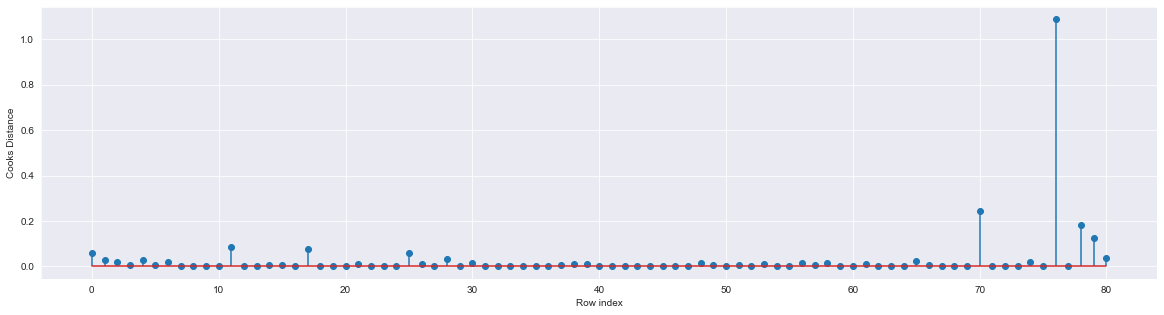

In [25]:
# Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 5))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [26]:
#index and value of influencer where c is more than 0.5
(np.argmax(c),np.max(c))

(76, 1.0865193998180098)

### High Influence Points-Hat Points

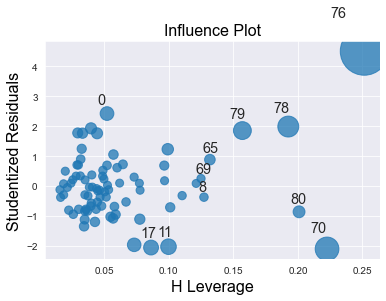

In [27]:
influence_plot(model)
plt.show()

In [28]:
#to set a leverge 
k = cars.shape[1] # k-columns
n = cars.shape[0]  # n-obs/rows
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff 

0.2222222222222222

From the above plot, it is evident that data point 70 and 76 are the influencers

In [29]:
# to actually check the row values of outliers
cars[cars.index.isin([70, 76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [30]:
#to compare the outlier value with the other values
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


### Improving the Model

In [57]:
cars_new = pd.read_csv("/08.Cars.csv")

In [58]:
#Deleting the outlier row[0] and reseting the cloumn index (reset_index())
car1=cars_new.drop(cars_new.index[[70,76]],axis=0).reset_index()

In [59]:
#Drop the original index
car1=car1.drop(['index'],axis=1)
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


### Build Model

In [60]:
#to again rebuilt the model,compare their r2,AIC values and make decision to keep which var
#calculating VIF and generating R2 and AIC values

In [66]:
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car1).fit()
(final_ml_V.rsquared,final_ml_V.rsquared_adj,final_ml_V.aic)

(0.8161692010376007, 0.8088159690791048, 446.11722639447726)

In [67]:
final_ml_W= smf.ols('MPG~WT+SP+HP',data = car1).fit()
(final_ml_W.rsquared,final_ml_W.rsquared_adj,final_ml_W.aic)

(0.8160034320495304, 0.8086435693315116, 446.1884323575032)

Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence, include variable 'VOL' and dicard the variable 'WT' so that multi collinearity problem would be resolved.

## Cook’s Distance

In [63]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

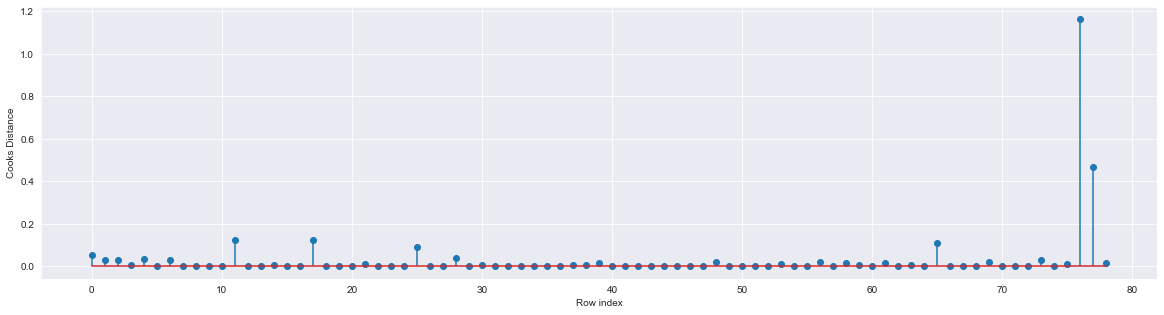

In [65]:
fig= plt.subplots(figsize=(20,5))
plt.stem(np.arange(len(car1)),np.round(c_V,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [69]:
(np.argmax(c_V),np.max(c_V))

(76, 1.1629387469135095)

In [70]:
car2=car1.drop(car1.index[[76,77]],axis=0)
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [75]:
#Reset the index and re arrange the row values
car3=car2.reset_index()

In [42]:
car4=car3.drop(['index'],axis=1)
car4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [76]:
#Build the model on the new data
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()

In [77]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

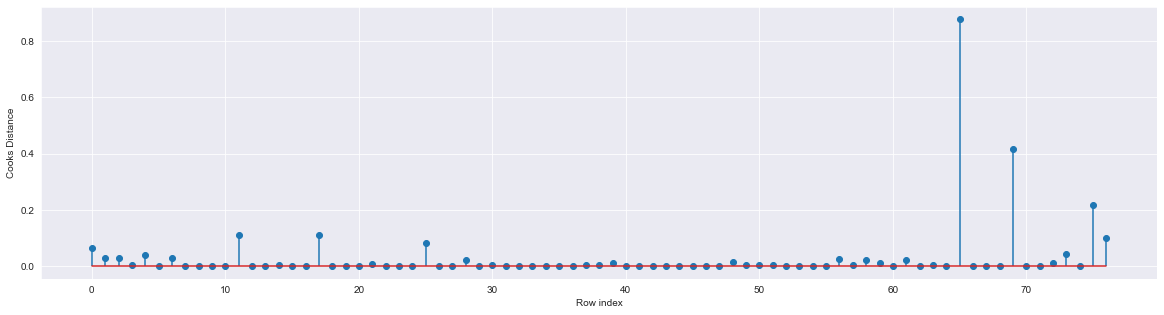

In [78]:
fig= plt.subplots(figsize=(20,5))
plt.stem(np.arange(len(car4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [79]:
(np.argmax(c_V),np.max(c_V))

(65, 0.8774556986296826)

###### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [47]:
#Check the accuracy of the mode
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()

In [68]:
(final_ml_V.rsquared,final_ml_V.rsquared_adj,final_ml_V.aic)

(0.8161692010376007, 0.8088159690791048, 446.11722639447726)

The model has gradually improved in R2 ↑increased from 0.7705 to 0.8161 & Adj R2 ↑increased from 0.7585 to 0.8088 & AIC ↓decreased from 477.928 to 446.117

### Predicting for New Data

In [81]:
# predicting by creating new df and dictionary for values
new_data=pd.DataFrame({'HP':40,"VOL":95,"SP":102,"WT":35},index=[1])

In [82]:
final_ml_V.predict(new_data)

1    46.035594
dtype: float64

In [51]:
final_ml_V.predict(cars_new.iloc[0:5,])

0    45.428872
1    43.992392
2    43.992392
3    43.508150
4    44.085858
dtype: float64

In [52]:
pred_y = final_ml_V.predict(cars_new)
pred_y

0     45.428872
1     43.992392
2     43.992392
3     43.508150
4     44.085858
        ...    
76     7.165876
77    12.198598
78    14.908588
79     4.163958
80     9.161202
Length: 81, dtype: float64